In [ ]:
#libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Disabling warnings
import warnings
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv("/content/vgsales.csv")
data1 = data.copy()
display(data1.head())


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
display(data1.tail())

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
#Clean nan values in year and publisher columns
data1.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
#We check the unique values in categorical variables and years.
display(data1.Platform.unique())
display(data1.Genre.unique())
display(data1.Year.unique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [ ]:
display(len(data1.Platform.unique()))
display(len(data1.Genre.unique()))
display(len(data1.Publisher.unique()))

31

12

579

In [ ]:
#Data Cleaning
'''There is a category in Platform feature called 2600. When we look that in google search, we see that the actual name is Atari 2600. Thus, we replace 2600 with Atari.'''
data1['Platform'].replace('2600', 'Atari', inplace=True)
#We see that there is a gap between 2017 and 2020 and there is only one observation in 2020, so we drop that observation.
sorted((data1.Year.unique()))

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 nan,
 2016.0,
 2017.0,
 2020.0]

In [ ]:
data1[data1.Year>2017]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [ ]:
data1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# replace nan values in Publisher feature with Unknown, and nan values in Year feature with the most frequent year.
data1[data1.Publisher.isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [ ]:
data1.Publisher.fillna('Unknown', inplace=True)

In [ ]:
data1.Year.fillna(data1.Year.mode()[0], inplace=True)

In [ ]:
data1.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
data1.Year = data1.Year.astype('int64')
data1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
#Exploratory data analysis
data1.describe() #statistical information about the columns (variables) in the DataFrame data1

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.448789,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.790533,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
data1.corr()#computes the correlation matrix for the columns (variables) in the DataFrame data1.

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.177803,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.177803,1.000000,-0.091454,0.005208,-0.170139,0.040322,-0.075303
NA_Sales,-0.401362,-0.091454,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.005208,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.170139,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.040322,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.075303,0.941047,0.902836,0.611816,0.748331,1.000000


In [ ]:
display(data1.Platform.value_counts())
print(" ")
display(data1.Genre.value_counts())
print(" ")
display(data1.Publisher.value_counts())
'''DS and PS2 are the top 2 platforms for video games.
Action and Sports are the top 2 genres of video games.
Electronic Arts is the top publisher of video games.'''

DS       2163
PS2      2161
PS3      1329
Wii      1325
X360     1265
PSP      1213
PS       1196
PC        960
XB        824
GBA       822
GC        556
3DS       509
PSV       413
PS4       336
N64       319
SNES      239
XOne      213
SAT       173
WiiU      143
Atari     133
NES        98
GB         98
DC         52
GEN        27
NG         12
SCD         6
WS          6
3DO         3
TG16        2
GG          1
PCFX        1
Name: Platform, dtype: int64

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

'DS and PS2 are the top 2 platforms for video games.\nAction and Sports are the top 2 genres of video games.\nElectronic Arts is the top publisher of video games.'

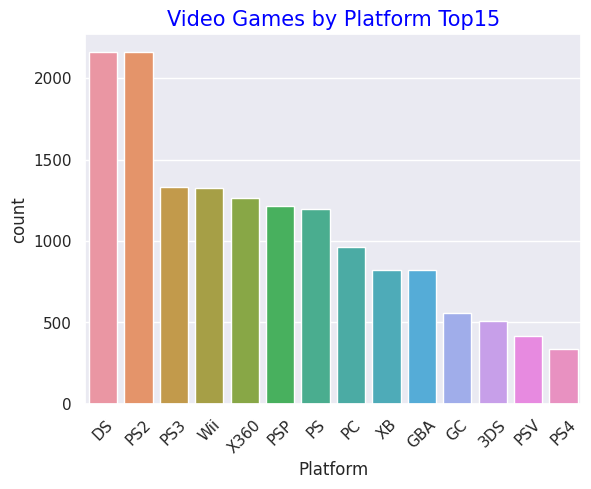

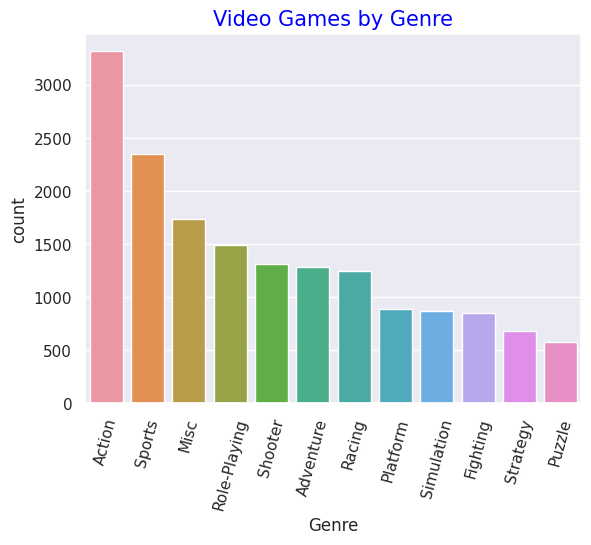

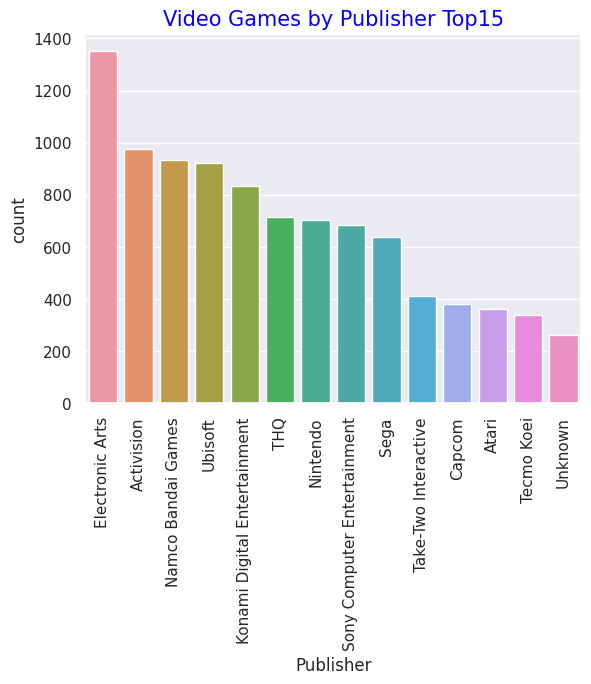

In [ ]:
plt.subplots(1,1)
sns.countplot(data=data1, x='Platform', order=data1['Platform'].value_counts().iloc[:14].index)
plt.xticks(rotation= 45)
plt.title("Video Games by Platform Top15",color = 'blue',fontsize=15)
plt.show()

plt.subplots(1,1)
sns.countplot(data=data1, x='Genre', order=data1['Genre'].value_counts().index)
plt.title("Video Games by Genre",color = 'blue',fontsize=15)
plt.xticks(rotation= 75)
plt.show()

plt.subplots(1,1)
sns.countplot(data=data1, x='Publisher', order=data1['Publisher'].value_counts().iloc[0:14].index)
plt.title("Video Games by Publisher Top15",color = 'blue',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

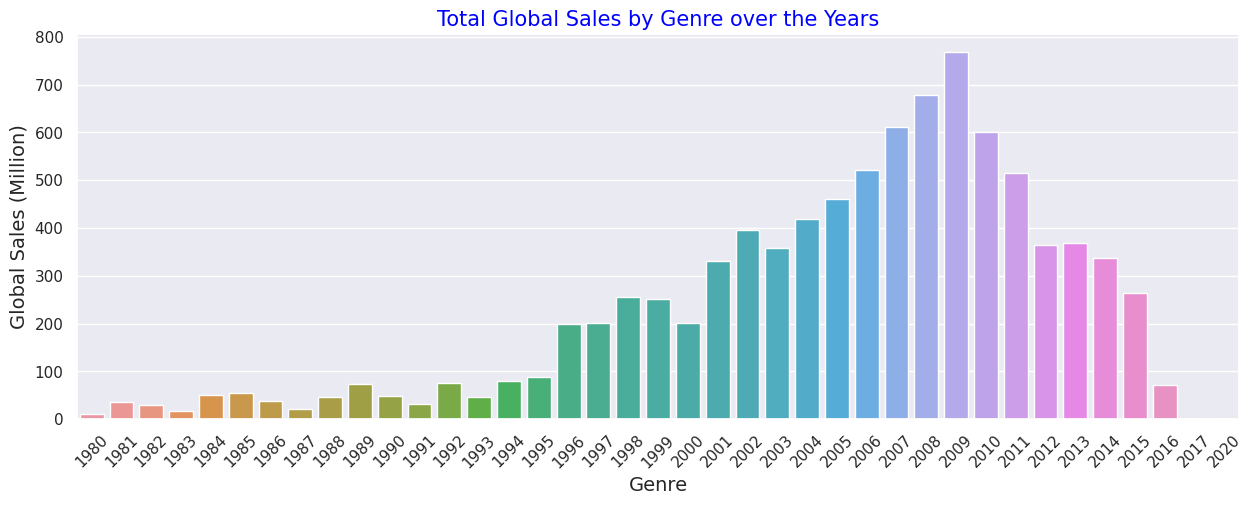

In [ ]:
#Total Global Sales by Genre over the Years
global_sales_year = data1.groupby('Year')['Global_Sales'].sum()
global_sales_year_index = data1.groupby('Year')['Global_Sales'].sum().index
plt.figure(figsize=(15, 5))
sns.barplot(x=global_sales_year_index, y=global_sales_year)
plt.xticks(rotation= 45)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Global Sales (Million)', fontsize=14)
plt.title('Total Global Sales by Genre over the Years', color = 'blue', fontsize=15)
plt.show()

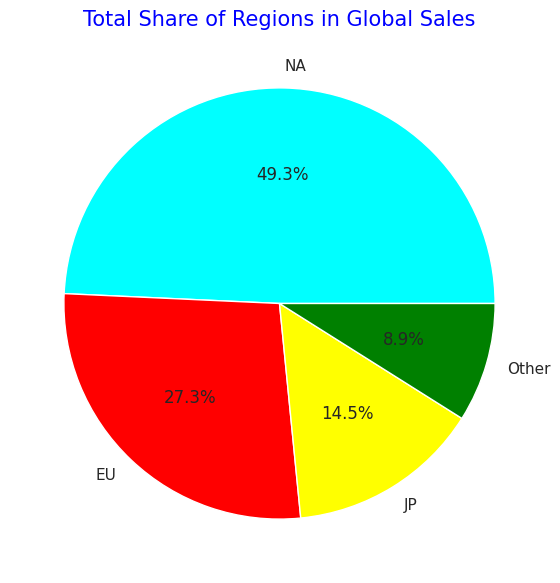

In [ ]:
sales_region = [data1.NA_Sales.sum(),data1.EU_Sales.sum(),data1.JP_Sales.sum(),data1.Other_Sales.sum()]
labels = ['NA', 'EU', 'JP', 'Other']
colors = ['cyan','red','yellow','green']

# visual
plt.figure(figsize = (7,7))
plt.pie(sales_region, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Total Share of Regions in Global Sales', color = 'blue', fontsize = 15)
plt.show()

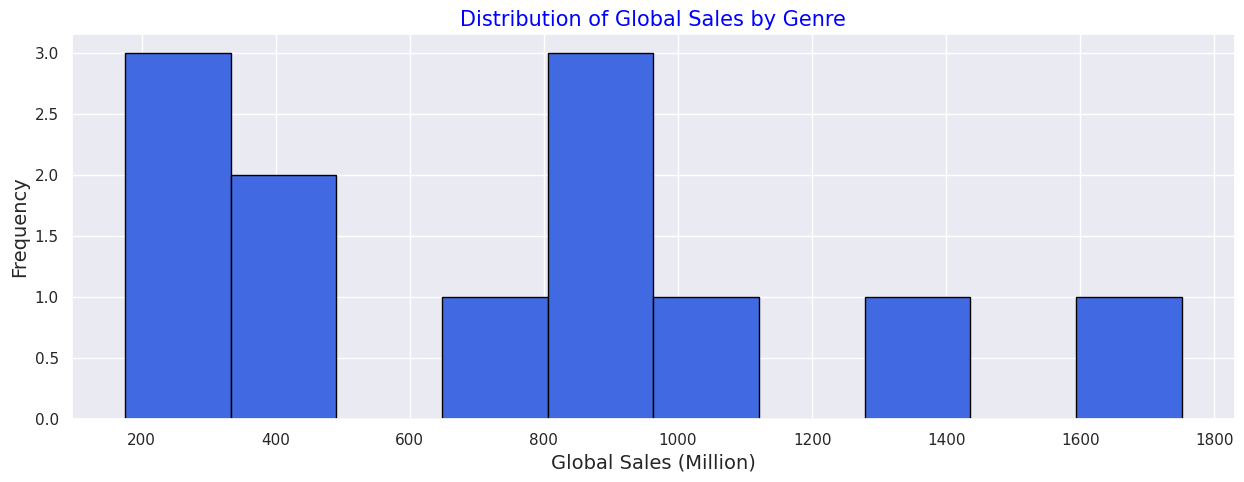

In [ ]:
global_sales_genre = data1.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 5))

plt.hist(global_sales_genre, bins=10, color='royalblue', edgecolor='black')
plt.xlabel('Global Sales (Million)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Global Sales by Genre', color='blue', fontsize=15)

plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature columns and target variable
X = data1[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = data1['Global_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Calculate efficiency as a percentage
efficiency_percentage = r2 * 100

# Print efficiency
print(f"Efficiency: {efficiency_percentage:.2f}%")
print("lntercept:", model. intercept_)

Mean Squared Error: 2.7401694787215e-05
R-squared: 0.9999934779050468
Efficiency: 100.00%
lntercept: 0.001959600520083038
